# Business Understanding

## Describe the purpose of the data set you selected:

&emsp; This data is the collection of two datasets, one which is from a resort hotel and the other which is from a city hotel. The datasets have 40,060 observations and 79,330 obeservations respectively with both sharing 31 variables. The observations time range from July 1st 2015 until August 31st 2017. The data was orginally collected from "Hotel Booking Demand Datasets", written by Nuno Antonio, Ana Almeida, and Luis Nune for Data in Brief, Volume 22, February 2019. The data was consolidated from bookings, change logs, meal, transaction, and customer profiles.
<br>    
![title](dataset_origin_image.jpg)
<br>
   
&emsp; The primary purpose for the selection of this dataset is to research revenue management,such as the forecast of demand and prediction of problems such the likelihood of a hotel booking to be cancelled. Additionally this data could be used to generate models to see when is the ideal time to book a hotel room, or which days and for how long could you get the best rates. 
    
    

# Data Understanding

## Describe the meaning and type of data:
&emsp; The full description of the data can be found in https://www.sciencedirect.com/science/article/pii/S2352340918315191:


| Variable | Type | Description | Source/Engineering |
| --- | --- | --- | --- |
| ADR | Numeric | Average Daily Rate as defined by | BO, BL and TR / Calculated by dividing the sum of all lodging transactions by the total number of staying nights |
| Adults | Integer | Number of adults | BO and BL |
| Agent | Categorical | ID of the travel agency that made the bookinga | BO and BL |
| ArrivalDateDayOfMonth | Integer | Day of the month of the arrival date | BO and BL |
| ArrivalDateMonth | Categorical | Month of arrival date with 12 categories: “January” to “December”| BO and BL |
| ArrivalDateWeekNumber	| Integer | Week number of the arrival date | BO and BL |
| ArrivalDateYear | Integer | Year of arrival date | BO and BL |
| AssignedRoomType | Categorical | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons | BO and BL |
| Babies | Integer | Number of babies | BO and BL |
| BookingChanges | Integer | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation | BO and BL/Calculated by adding the number of unique iterations that change some of the booking attributes, namely: persons, arrival date, nights, reserved room type or meal |
| Children | Integer | Number of children | BO and BL/Sum of both payable and non-payable children |
| Company | Categorical | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons	BO and BL. |
| Country | Categorical | Country of origin. Categories are represented in the ISO 3155–3:2013 format [6] | BO, BL and NT |
| CustomerType | Categorical | Type of booking, assuming one of four categories: <br> Contract - when the booking has an allotment or other type of contract associated to it; <br> Group – when the booking is associated to a group; <br> Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; <br> Transient-party – when the booking is transient, but is associated to at least other transient booking <br> | BO and BL |
| DaysInWaitingList | Integer | Number of days the booking was in the waiting list before it was confirmed to the customer | BO/Calculated by subtracting the date the booking was confirmed to the customer from the date the booking entered on the PMS |
| DepositType | Categorical | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: <br> No Deposit – no deposit was made; <br> Non Refund – a deposit was made in the value of the total stay cost; <br> Refundable – a deposit was made with a value under the total cost of stay. | BO and TR/Value calculated based on the payments identified for the booking in the transaction (TR) table before the booking׳s arrival or cancellation date. |
| DistributionChannel | Categorical | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” | BO, BL and DC |
| IsCanceled | Categorical | Value indicating if the booking was canceled (1) or not (0) | BO |
| IsRepeatedGuest | Categorical | Value indicating if the booking name was from a repeated guest (1) or not (0) | BO, BL and C/ Variable created by verifying if a profile was associated with the booking customer. If so, and if the customer profile creation date was prior to the creation date for the booking on the PMS database it was assumed the booking was from a repeated guest |
| LeadTime | Integer | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date | BO and BL/ Subtraction of the entering date from the arrival date |
| MarketSegment | Categorical | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” | BO, BL and MS |
| Meal | Categorical | Type of meal booked. | Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package; <br> BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) | BO, BL and ML |
| PreviousBookingsNotCanceled | Integer | Number of previous bookings not cancelled by the customer prior to the current booking | BO and BL / In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and not canceled. |
| PreviousCancellations | Integer | Number of previous bookings that were cancelled by the customer prior to the current booking | BO and BL/ In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and canceled. |
| RequiredCardParkingSpaces | Integer | Number of car parking spaces required by the customer | BO and BL |
| ReservationStatus | Categorical | Reservation last status, assuming one of three categories: <br> Canceled – booking was canceled by the customer; <br> Check-Out – customer has checked in but already departed; <br> No-Show – customer did not check-in and did inform the hotel of the reason why | BO |
| ReservationStatusDate | Date | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel | BO |
| ReservedRoomType | Categorical | Code of room type reserved. Code is presented instead of designation for anonymity reasons | BO and BL |
| StaysInWeekendNights | Integer | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel | BO and BL/ Calculated by counting the number of weekend nights from the total number of nights |
| StaysInWeekNights | Integer | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel | BO and BL/Calculated by counting the number of week nights from the total number of nights |
| TotalOfSpecialRequests | Integer | Number of special requests made by the customer (e.g. twin bed or high floor) | BO and BL/Sum of all special requests |
<br>


## Verify Data Quality

&emsp; Upon initial inspection of the 31 attributes 4 appear to have some missing data. However 3 additional attributes also appear to have missing data but instead of appearing as 'nan' they are labeled as 'Undefined'. Below is a list of all the attributes with missing values and the counts:

<ul>
<li>agent- 16340 </li>
<li>company- 112593</li>
<li>children- 4</li>
<li>country- 488</li>
<li>market_segment - 2</li> 
<li>meal - 1169</li>
<li>distribution_channel - 5 </li>
</ul>


&emsp; There's an association between the distribution channel type and the agent and company attributes. If the distribution channel is from a Traveling Agent or Tour Operator, then the agency company is supplied in the agent column. Similarly if the distribution channel is Corporate, then the company associated with the booking is populated under the company attribute. If the distribution is neither Corporate, TA or TO than both the agent and company attributes will be null. To simplify our data exploration we have decided to remove the agent and company attributes as they don't provide any additional information beyond what already is provided in the distribution channel. For the meal attribute during our data investigation we have found out that 'Undefined' and 'SC' are synonymous so we have decided to replace 'Undefined' with 'SC'. For the remainder they appear to have been ommitted accidentally and we have to decided to populate the missing values with the mode. 


Additionally, the following attributes were classified as objects, however they're categorical in nature so we have decided to encode each of these attributes with a corresponding number according to their alphabetical order:

<ul>
<li>hotel - ['City Hotel', 'Resort Hotel']</li>
<li>market_segment - ['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups',
       'Offline TA/TO', 'Online TA']</li>
<li>meal - ['BB', 'FB', 'HB', 'SC']</li>
<li>reservation_status - ['Canceled', 'Check-Out', 'No-Show']</li>
<li>distribution_channel - ['Corporate', 'Direct', 'GDS', 'TA/TO']</li>
<li>reserved_room_type - ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P']</li>
<li>assigned_room_type - ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P']</li>
<li>deposit_type - ['No Deposit', 'Non Refund', 'Refundable']</li>
<li>country - [['ABW','AGO','AIA','ALB','AND', 'ARE', 'ARG', 'ARM',
 'ASM', 'ATA', 'ATF', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA',
 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB', 'BWA',
 'CAF', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'CN', 'COL', 'COM', 'CPV',
 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM',
 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FRO',
 'GAB', 'GBR', 'GEO', 'GGY', 'GHA', 'GIB', 'GLP', 'GNB', 'GRC', 'GTM', 'GUY',
 'HKG', 'HND', 'HRV', 'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL',
 'ISR', 'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KHM', 'KIR',
 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBY', 'LCA', 'LIE', 'LKA', 'LTU', 'LUX',
 'LVA', 'MAC', 'MAR', 'MCO' 'MDG', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR',
 'MNE', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'MYT', 'NAM', 'NCL', 'NGA', 'NIC',
 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PLW', 'POL',
 'PRI', 'PRT', 'PRY', 'PYF', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SDN', 'SEN',
 'SGP', 'SLE', 'SLV', 'SMR', 'SRB', 'STP', 'SUR', 'SVK', 'SVN', 'SWE', 'SYC',
 'SYR', 'TGO', 'THA', 'TJK', 'TMP', 'TUN', 'TUR', 'TWN', 'TZA', 'UGA', 'UKR', 'UMI',
 'URY', 'USA', 'UZB', 'VEN', 'VGB', 'VNM', 'ZAF', 'ZMB', 'ZWE']]</li>
<li>customer_type - ['Contract', 'Group', 'Transient', 'Transient-Party']</li>
</ul>    


Lastly, for the arrival_date_month we decided to encode according to their correspoding month number in the gregorian calendar and construct two new columns that correspond to the generated timestamp from the concatenated arrival date and the reservation_status_date to help out with regression later on.





In [1]:
import pandas as pd
import numpy as np

hotel_bookings = pd.read_csv('hotel_bookings.csv') # read in the csv file

hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [2]:
hotel_bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [3]:
hotel_bookings.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [4]:
hotel_bookings.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [5]:
hotel_bookings.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [6]:
hotel_bookings.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [7]:
hotel_bookings.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [8]:
hotel_bookings.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [9]:
hotel_bookings.assigned_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [10]:
hotel_bookings.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [11]:
hotel_bookings.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [12]:
hotel_bookings.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [13]:
hotel_bookings.loc[hotel_bookings['market_segment'] == 'Undefined']['market_segment'].count()

2

In [14]:
hotel_bookings.loc[hotel_bookings['meal'] == 'Undefined']['meal'].count()

1169

In [15]:
hotel_bookings.loc[hotel_bookings['distribution_channel'] == 'Undefined']['distribution_channel'].count()


5

In [16]:
hotel_bookings[['children','country','market_segment','meal','distribution_channel']].mode() 

,children,country,market_segment,meal,distribution_channel
0,0.0,PRT,Online TA,BB,TA/TO


In [17]:
import math
import numpy as np
hotel_bookings_transform = hotel_bookings
hotel_bookings_transform['children']= hotel_bookings_transform['children'].apply(lambda x: 0 if  math.isnan(x)  else x)
hotel_bookings_transform['country']= hotel_bookings_transform['country'].apply(lambda x: 'PRT' if  pd.isna(x)  else x)
hotel_bookings_transform['market_segment']= hotel_bookings_transform['market_segment'].apply(lambda x: 'Online TA' if  x == 'Undefined'  else x)
hotel_bookings_transform['meal']= hotel_bookings_transform['meal'].apply(lambda x: 'SC' if  x == 'Undefined'  else x)
hotel_bookings_transform['distribution_channel']= hotel_bookings_transform['distribution_channel'].apply(lambda x: 'TA/TO' if  x == 'Undefined'  else x)





In [18]:
# hotel - ['Resort Hotel', 'City Hotel']
# market_segment - ['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
#        'Complementary', 'Groups', 'Aviation']
# meal - ['BB', 'FB', 'HB', 'SC']
# reservation_status - ['Check-Out', 'Canceled', 'No-Show']
# distribution_channel - ['Direct', 'Corporate', 'TA/TO', 'GDS']
# reserved_room_type - ['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B']
# assigned_room_type - ['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K']
# deposit_type - ['No Deposit', 'Refundable', 'Non Refund']
# country - ['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
#        'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
#        'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
#        'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
#        'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
#        'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
#        'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
#        'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
#        'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
#        'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
#        'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
#        'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
#        'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
#        'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
#        'KNA', 'ETH', 'IRQ', 'HND', 'RWA', 'KHM', 'MCO', 'BGD', 'IMN',
#        'TJK', 'NIC', 'BEN', 'VGB', 'TZA', 'GAB', 'GHA', 'TMP', 'GLP',
#        'KEN', 'LIE', 'GNB', 'MNE', 'UMI', 'MYT', 'FRO', 'MMR', 'PAN',
#        'BFA', 'LBY', 'MLI', 'NAM', 'BOL', 'PRY', 'BRB', 'ABW', 'AIA',
#        'SLV', 'DMA', 'PYF', 'GUY', 'LCA', 'ATA', 'GTM', 'ASM', 'MRT',
#        'NCL', 'KIR', 'SDN', 'ATF', 'SLE', 'LAO']
# customer_type - ['Transient', 'Contract', 'Transient-Party', 'Group']

scat = hotel_bookings['country'].astype('category').cat.categories

scat.tolist()

['ABW',
 'AGO',
 'AIA',
 'ALB',
 'AND',
 'ARE',
 'ARG',
 'ARM',
 'ASM',
 'ATA',
 'ATF',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BHS',
 'BIH',
 'BLR',
 'BOL',
 'BRA',
 'BRB',
 'BWA',
 'CAF',
 'CHE',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'CN',
 'COL',
 'COM',
 'CPV',
 'CRI',
 'CUB',
 'CYM',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DMA',
 'DNK',
 'DOM',
 'DZA',
 'ECU',
 'EGY',
 'ESP',
 'EST',
 'ETH',
 'FIN',
 'FJI',
 'FRA',
 'FRO',
 'GAB',
 'GBR',
 'GEO',
 'GGY',
 'GHA',
 'GIB',
 'GLP',
 'GNB',
 'GRC',
 'GTM',
 'GUY',
 'HKG',
 'HND',
 'HRV',
 'HUN',
 'IDN',
 'IMN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JEY',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KHM',
 'KIR',
 'KNA',
 'KOR',
 'KWT',
 'LAO',
 'LBN',
 'LBY',
 'LCA',
 'LIE',
 'LKA',
 'LTU',
 'LUX',
 'LVA',
 'MAC',
 'MAR',
 'MCO',
 'MDG',
 'MDV',
 'MEX',
 'MKD',
 'MLI',
 'MLT',
 'MMR',
 'MNE',
 'MOZ',
 'MRT',
 'MUS',
 'MWI',
 'MYS',
 'MYT',
 'NAM',
 'NCL',
 'NGA',
 'NIC',
 'NLD',
 'NOR',
 

In [19]:
hotel_bookings['hotel'].astype('category').cat.categories

Index(['City Hotel', 'Resort Hotel'], dtype='object')

In [20]:
hotel_bookings['market_segment'].astype('category').cat.categories

Index(['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups',
       'Offline TA/TO', 'Online TA'],
      dtype='object')

In [21]:
hotel_bookings['meal'].astype('category').cat.categories

Index(['BB', 'FB', 'HB', 'SC'], dtype='object')

In [22]:
hotel_bookings['reservation_status'].astype('category').cat.categories

Index(['Canceled', 'Check-Out', 'No-Show'], dtype='object')

In [23]:
hotel_bookings['distribution_channel'].astype('category').cat.categories

Index(['Corporate', 'Direct', 'GDS', 'TA/TO'], dtype='object')

In [24]:
hotel_bookings['reserved_room_type'].astype('category').cat.categories

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P'], dtype='object')

In [25]:
hotel_bookings['assigned_room_type'].astype('category').cat.categories

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P'], dtype='object')

In [26]:
hotel_bookings['deposit_type'].astype('category').cat.categories

Index(['No Deposit', 'Non Refund', 'Refundable'], dtype='object')

In [27]:
hotel_bookings['customer_type'].astype('category').cat.categories

Index(['Contract', 'Group', 'Transient', 'Transient-Party'], dtype='object')

In [28]:
hotel_bookings_transform['hotel']=hotel_bookings_transform['hotel'].astype('category').cat.codes
hotel_bookings_transform['market_segment']=hotel_bookings_transform['market_segment'].astype('category').cat.codes
hotel_bookings_transform['meal']=hotel_bookings_transform['meal'].astype('category').cat.codes
hotel_bookings_transform['reservation_status']=hotel_bookings_transform['reservation_status'].astype('category').cat.codes
hotel_bookings_transform['distribution_channel']=hotel_bookings_transform['distribution_channel'].astype('category').cat.codes
hotel_bookings_transform['reserved_room_type']=hotel_bookings_transform['reserved_room_type'].astype('category').cat.codes
hotel_bookings_transform['assigned_room_type']=hotel_bookings_transform['assigned_room_type'].astype('category').cat.codes
hotel_bookings_transform['deposit_type']=hotel_bookings_transform['deposit_type'].astype('category').cat.codes
hotel_bookings_transform['customer_type']=hotel_bookings_transform['customer_type'].astype('category').cat.codes

In [29]:
hotel_bookings_transform= hotel_bookings_transform.drop(columns=['agent','company'])

In [30]:
hotel_bookings_transform

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,July,27,1,0,0,2,...,2,3,0,0,2,0.00,0,0,1,2015-07-01
1,1,0,737,2015,July,27,1,0,0,2,...,2,4,0,0,2,0.00,0,0,1,2015-07-01
2,1,0,7,2015,July,27,1,0,1,1,...,2,0,0,0,2,75.00,0,0,1,2015-07-02
3,1,0,13,2015,July,27,1,0,1,1,...,0,0,0,0,2,75.00,0,0,1,2015-07-02
4,1,0,14,2015,July,27,1,0,2,2,...,0,0,0,0,2,98.00,0,1,1,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,August,35,30,2,5,2,...,0,0,0,0,2,96.14,0,0,1,2017-09-06
119386,0,0,102,2017,August,35,31,2,5,3,...,4,0,0,0,2,225.43,0,2,1,2017-09-07
119387,0,0,34,2017,August,35,31,2,5,2,...,3,0,0,0,2,157.71,0,4,1,2017-09-07
119388,0,0,109,2017,August,35,31,2,5,2,...,0,0,0,0,2,104.40,0,0,1,2017-09-07


In [31]:
assign_month = {"arrival_date_month": {"January": 1, "February": 2, "March": 3, "April": 4,"May": 5,"June": 6,"July": 7,"August": 8,"September": 9,"October": 10,"November": 11,"December": 12}}
#assign_cust = {"customer_type": {"Transient": 1, "Contract": 2, "Transient-Party": 3, "Group": 4 }}
hotel_bookings_transform = hotel_bookings_transform.replace(assign_month)
hotel_bookings_transform.head()




,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,7,27,1,0,0,2,...,2,3,0,0,2,0.0,0,0,1,2015-07-01
1,1,0,737,2015,7,27,1,0,0,2,...,2,4,0,0,2,0.0,0,0,1,2015-07-01
2,1,0,7,2015,7,27,1,0,1,1,...,2,0,0,0,2,75.0,0,0,1,2015-07-02
3,1,0,13,2015,7,27,1,0,1,1,...,0,0,0,0,2,75.0,0,0,1,2015-07-02
4,1,0,14,2015,7,27,1,0,2,2,...,0,0,0,0,2,98.0,0,1,1,2015-07-03


In [32]:
#TODO: modify this code with hotel_bookings
hotel_bookings_transform=hotel_bookings_transform.assign(booking_date = hotel_bookings_transform["arrival_date_year"].astype(str) + '-' + 
hotel_bookings_transform["arrival_date_month"].astype(str) + '-' +hotel_bookings_transform["arrival_date_day_of_month"].astype(str))
hotel_bookings_transform['booking_date']=pd.to_datetime(hotel_bookings_transform.booking_date)
hotel_bookings_transform['booking_date']

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: booking_date, Length: 119390, dtype: datetime64[ns]

In [33]:
hotel_bookings_transform.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [34]:
hotel_bookings.mode()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,0,2016,August,33,17,0,2,2,...,0,9.0,40.0,0,2,62.0,0,0,1,2015-10-21


In [35]:
hotel_bookings.loc[:,"agent"].mode()

0    9.0
dtype: float64

In [36]:
hotel_bookings.loc[:,"company"].mode()

0    40.0
dtype: float64

In [37]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int8   
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Simple Stastics


&emsp; Below you'll see some simple stastics for each and everyone of the values generated by the describe function. We decided to do check outliers for all the non-categorical values. As you'll  

Categoriacal Values:




In [38]:
hotel_bookings_transform.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.335539,0.370416,104.011416,2016.156554,6.552483,27.165173,15.798241,0.927599,2.500302,1.856403,...,0.989505,1.329399,0.221124,0.124893,2.321149,2.137323,101.831122,0.062518,0.571363,0.649803
std,0.472181,0.482918,106.863097,0.707476,3.090619,13.605138,8.780829,0.998613,1.908286,0.579261,...,1.697282,1.878762,0.652306,0.334678,17.594721,0.577040,50.535790,0.245291,0.792798,0.497776
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,18.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,69.290000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,69.000000,2016.000000,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,94.575000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,160.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,2.000000,126.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,19.000000,50.000000,55.000000,...,9.000000,11.000000,21.000000,2.000000,391.000000,3.000000,5400.000000,8.000000,5.000000,2.000000


In [39]:
hotel_bookings_transform.head()
from scipy import stats

hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['adr']])) > 3).all(axis=1)]['adr']


803       280.74
925       268.00
936       267.00
943       277.50
973       276.43
           ...  
119126    300.00
119140    258.00
119144    259.00
119151    270.00
119365    266.75
Name: adr, Length: 1138, dtype: float64

In [40]:
hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['lead_time']])) > 3).all(axis=1)]['lead_time']

1         737
890       460
4182      709
5704      468
5705      468
         ... 
119102    518
119107    518
119109    518
119111    518
119148    457
Name: lead_time, Length: 1454, dtype: int64

In [41]:
hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['adults']])) > 3).all(axis=1)]['adults']

125        4
354        4
1023       4
1539      40
1587      26
          ..
117453     0
117921     4
118200     0
118480     4
118911     4
Name: adults, Length: 481, dtype: int64

In [42]:
hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['previous_cancellations']])) > 3).all(axis=1)]['previous_cancellations']

14231     3
14779    26
14780    26
14781    26
14782    26
         ..
94396     5
94397     5
94398     5
94399     5
94400     5
Name: previous_cancellations, Length: 317, dtype: int64

In [43]:
hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['booking_changes']])) > 3).all(axis=1)]['booking_changes']

0          3
1          4
140        3
156        3
187        5
          ..
119224     4
119268    10
119284     4
119297     4
119356     3
Name: booking_changes, Length: 1570, dtype: int64

In [44]:
hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['days_in_waiting_list']])) > 3).all(axis=1)]['days_in_waiting_list']

3106      65
3107      65
3108      65
3111      65
3112      65
          ..
109305    63
109313    63
111263    84
112822    98
114733    59
Name: days_in_waiting_list, Length: 1871, dtype: int64

In [45]:
hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['total_of_special_requests']])) > 3).all(axis=1)]['total_of_special_requests']

12        3
15        3
198       3
200       3
228       3
         ..
119293    3
119334    4
119350    3
119376    3
119387    4
Name: total_of_special_requests, Length: 2877, dtype: int64

In [46]:
hotel_bookings_transform[(np.abs(stats.zscore(hotel_bookings_transform[['required_car_parking_spaces']])) > 3).all(axis=1)]['required_car_parking_spaces']

25        1
29        1
53        1
54        1
55        1
         ..
119158    1
119198    1
119236    1
119281    1
119329    1
Name: required_car_parking_spaces, Length: 7416, dtype: int64

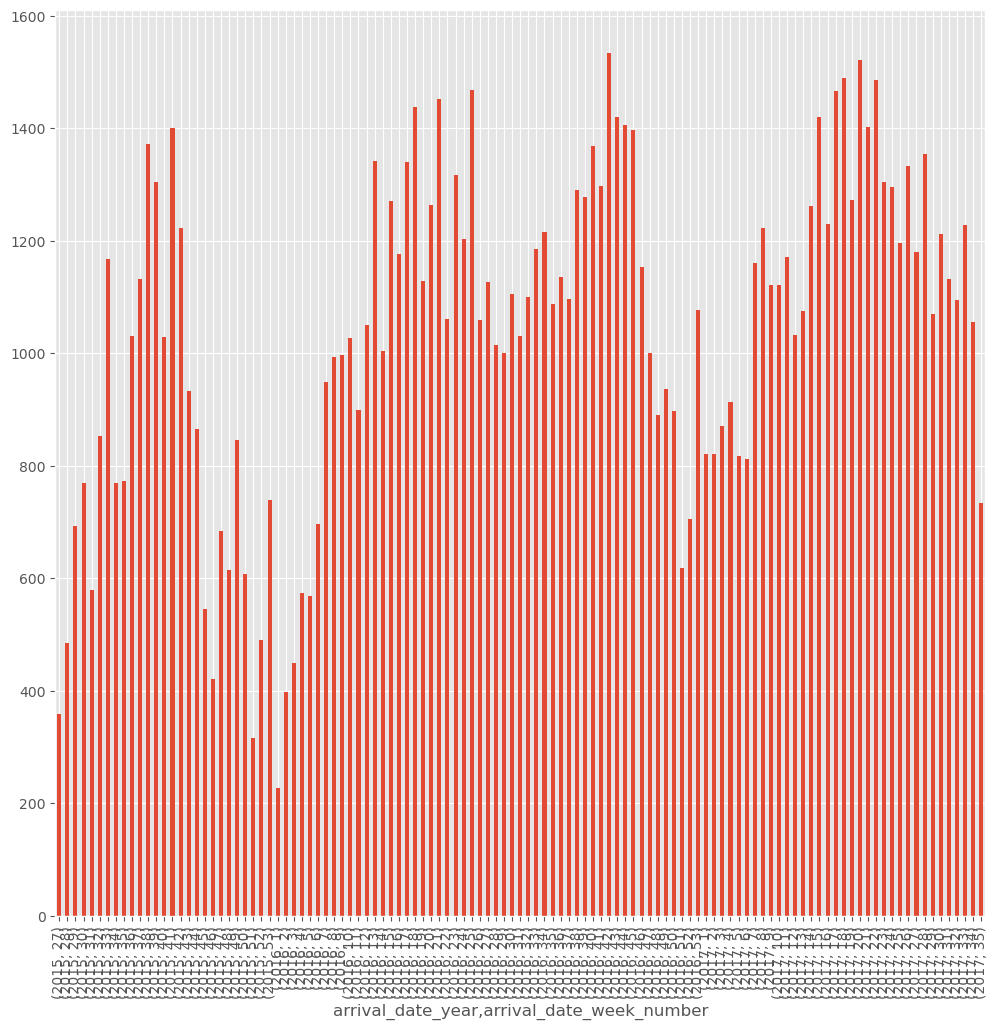

In [47]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
plt.style.use('ggplot')
fig=plt.figure(figsize=(12,12), dpi= 100, facecolor='w', edgecolor='k')

df_grouped = hotel_bookings.groupby(by=['arrival_date_year','arrival_date_week_number'])
visit_by_week = df_grouped.hotel.count()
b = visit_by_week.plot(kind='bar')

In [48]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
plt.style.use('ggplot')
fig=plt.figure(figsize=(12,30), dpi= 100, facecolor='w', edgecolor='k')

hotel_bookings2 = hotel_bookings
hotel_bookings2["arrival_date_year"] = hotel_bookings["arrival_date_year"].astype(str)
hotel_bookings2["arrival_date_week_number"] = hotel_bookings["arrival_date_week_number"].astype(str)

hotel_bookings2["week-date"] = hotel_bookings["arrival_date_year"].str.cat(hotel_bookings["arrival_date_week_number"],sep="-")
hotel_bookings2

#f = hotel_bookings2.groupby(by=['week-date','customer_type'])
hotel_bookings2[["week-date","customer_type","hotel"]]
f = hotel_bookings2.groupby(by=['week-date','customer_type'])
f.hotel.count()

f2 = hotel_bookings2.groupby(by=['customer_type'])

f2.hotel.count()


# sample = pd.crosstab([ hotel_bookings2['week-date'],hotel_bookings2['customer_type'] ], 
#                        hotel_bookings2.hotel.astype(bool))
# sample



#date_contract.info()
#f.groups()
#res = f.pivot(index='week-date', columns='category', values='quantity')



customer_type
0     4076
1      577
2    89613
3    25124
Name: hotel, dtype: int64

<Figure size 1200x3000 with 0 Axes>

array([[<AxesSubplot:title={'center':'hotel'}>,
        <AxesSubplot:title={'center':'is_canceled'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'stays_in_weekend_nights'}>],
       [<AxesSubplot:title={'center':'stays_in_week_nights'}>,
        <AxesSubplot:title={'center':'adults'}>,
        <AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>,
        <AxesSubplot:title={'center':'meal'}>],
       [<AxesSubplot:title={'center':'market_segment'}>,
        <AxesSubplot:title={'center':'distribution_channel'}>,
        <AxesSubplot:title={'center':'is_repeated_guest'}>,
        <AxesSubplot:title={'center':'previous_cancellations'}>,
        <AxesSubplot:title={'center':'previous_bookings_not_canceled'}>],
       [<AxesSubplot:title={'center':'reserved_room_type'}>,
        <AxesSubplot:title={'center':'assigned_room_type'}>,
        <A

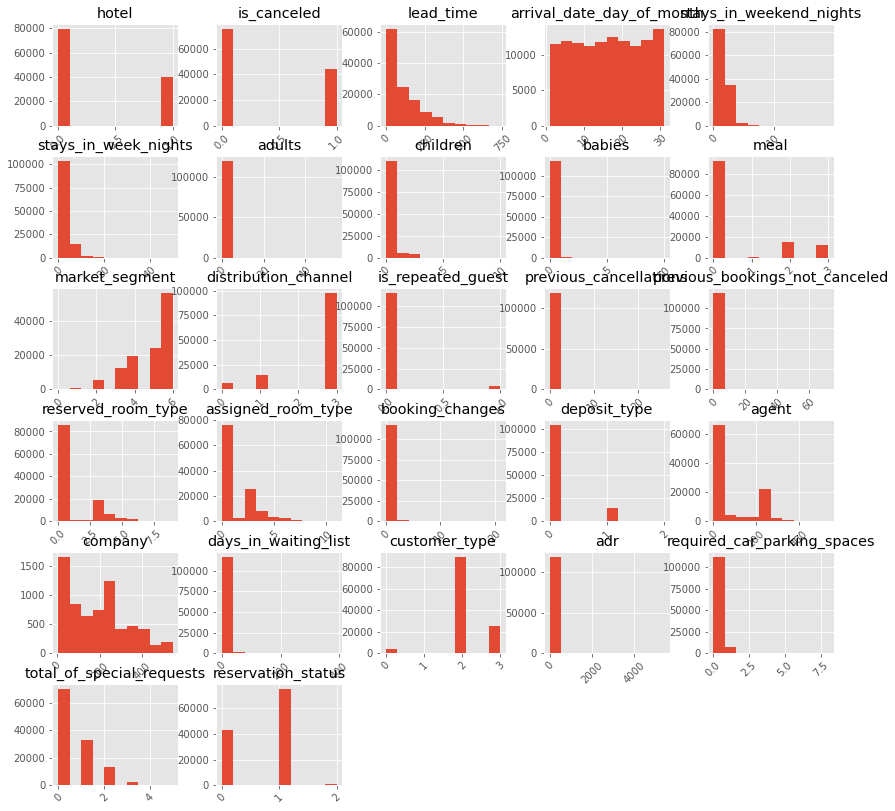

In [49]:
hotel_bookings.hist(figsize=(14,14), xrot=45)

In [50]:
hotel_bookings2= hotel_bookings
hotel_bookings2["arrival_date_year"] = hotel_bookings["arrival_date_year"].astype(str)
hotel_bookings2["arrival_date_week_number"] = hotel_bookings["arrival_date_month"].astype(str)
hotel_bookings2["arrival_date_day_of_month"] = hotel_bookings["arrival_date_day_of_month"].astype(str)

hotel_bookings2["booking-date-temp"] = hotel_bookings["arrival_date_year"].str.cat(hotel_bookings["arrival_date_month"],sep="-")

hotel_bookings2["booking-date"]  = hotel_bookings["booking-date-temp"].str.cat(hotel_bookings["arrival_date_day_of_month"],sep="-")

hotel_bookings2.head()



##iso timestamp/ unix timestamp


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,week-date,booking-date-temp,booking-date
0,1,0,342,2015,July,July,1,0,0,2,...,0,2,0.0,0,0,1,2015-07-01,2015-27,2015-July,2015-July-1
1,1,0,737,2015,July,July,1,0,0,2,...,0,2,0.0,0,0,1,2015-07-01,2015-27,2015-July,2015-July-1
2,1,0,7,2015,July,July,1,0,1,1,...,0,2,75.0,0,0,1,2015-07-02,2015-27,2015-July,2015-July-1
3,1,0,13,2015,July,July,1,0,1,1,...,0,2,75.0,0,0,1,2015-07-02,2015-27,2015-July,2015-July-1
4,1,0,14,2015,July,July,1,0,2,2,...,0,2,98.0,0,1,1,2015-07-03,2015-27,2015-July,2015-July-1


In [51]:
hotel_bookings[["market_segment","distribution_channel","reservation_status","reservation_status_date"]]

hotel_bookings.reservation_status.unique()
hotel_bookings.hotel.unique()
#customer type encoded
hotel_bookings.customer_type.unique()
hotel_bookings.market_segment.unique()


array([3, 2, 6, 5, 1, 4, 0], dtype=int8)

In [52]:
hotel_bookings.distribution_channel.unique()

array([1, 0, 3, 2], dtype=int8)

In [53]:
hotel_bookings.reserved_room_type.unique()

array([2, 0, 3, 4, 6, 5, 7, 8, 9, 1], dtype=int8)

In [54]:
hotel_bookings.assigned_room_type.unique()
#find if room type changed

array([ 2,  0,  3,  4,  6,  5,  8,  1,  7, 11, 10,  9], dtype=int8)

In [55]:
hotel_bookings.deposit_type.unique()

array([0, 2, 1], dtype=int8)

In [56]:
hotel_bookings.agent.unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [57]:
hotel_bookings.company.unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [58]:
hotel_bookings.meal.unique()

array([0, 1, 2, 3], dtype=int8)

In [59]:
hotel_bookings.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [60]:
## import statsmodels.api as sm

hotel_bookings['hotel'] = hotel_bookings['hotel'].astype('category')
hotel_bookings['arrival_date_month'] = hotel_bookings['arrival_date_month'].astype('category')

Xtrain = hotel_bookings[['lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number','stays_in_weekend_nights','stays_in_week_nights']]

Ytrain = hotel_bookings[['is_canceled']]

#hotel, arrival_date_month change to category
#replace nans of children


# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 119390 entries, 0 to 119389
# Data columns (total 32 columns):
#  #   Column                          Non-Null Count   Dtype  
# ---  ------                          --------------   -----  
#  0   hotel                           119390 non-null  object 
#  1   is_canceled                     119390 non-null  int64  
#  2   lead_time                       119390 non-null  int64  
#  3   arrival_date_year               119390 non-null  int64  
#  4   arrival_date_month              119390 non-null  object 
#  5   arrival_date_week_number        119390 non-null  int64  
#  6   arrival_date_day_of_month       119390 non-null  int64  
#  7   stays_in_weekend_nights         119390 non-null  int64  
#  8   stays_in_week_nights            119390 non-null  int64  
#  9   adults                          119390 non-null  int64  
#  10  children                        119386 non-null  float64
#  11  babies                          119390 non-null  int64  
#  12  meal                            119390 non-null  object 
#  13  country                         118902 non-null  object 
#  14  market_segment                  119390 non-null  object 
#  15  distribution_channel            119390 non-null  object 
#  16  is_repeated_guest               119390 non-null  int64  
#  17  previous_cancellations          119390 non-null  int64  
#  18  previous_bookings_not_canceled  119390 non-null  int64  
#  19  reserved_room_type              119390 non-null  object 
#  20  assigned_room_type              119390 non-null  object 
#  21  booking_changes                 119390 non-null  int64  
#  22  deposit_type                    119390 non-null  object 
#  23  agent                           103050 non-null  float64
#  24  company                         6797 non-null    float64
#  25  days_in_waiting_list            119390 non-null  int64  
#  26  customer_type                   119390 non-null  object 
#  27  adr                             119390 non-null  float64
#  28  required_car_parking_spaces     119390 non-null  int64  
#  29  total_of_special_requests       119390 non-null  int64  
#  30  reservation_status              119390 non-null  object 
#  31  reservation_status_date         119390 non-null  object 
# dtypes: float64(4), int64(16), object(12)
# memory usage: 29.1+ MB

#hotel encode
#arrival_date_month
#customer type encoded
#reservation_status encoded
#reservation_status_date 

#replace agent with binary value
#replace company with binary value



log_reg = sm.Logit(hotel_bookings['is_canceled'], sm.add_constant(hotel_bookings[['arrival_date_year']+['lead_time']
                                                                                 +['arrival_date_week_number']
                                                                                 +['stays_in_weekend_nights']
                                                                                 +['arrival_date_day_of_month']
                                                                                 +['stays_in_week_nights']
                                                                                 +['adults']+['babies']
                                                                                 +['is_repeated_guest']
                                                                                 +['previous_cancellations']
                                                                                 +['previous_bookings_not_canceled']
                                                                                 +['booking_changes']
                                                                                +['days_in_waiting_list']
                                                                                 +['adr']
                                                                                 +['required_car_parking_spaces']
                                                                                 +['total_of_special_requests']
                                                                                ])).fit()

log_reg.summary2()
#hotel_bookings.info()


#log_reg.aic







NameError: name 'sm' is not defined

In [61]:
log_reg = sm.Logit(hotel_bookings['is_canceled'], sm.add_constant(hotel_bookings[['arrival_date_year']+['lead_time']
                                                                                 +['arrival_date_week_number']
                                                                                 +['stays_in_weekend_nights']
                                                                                 +['arrival_date_day_of_month']
                                                                                 +['stays_in_week_nights']
                                                                                 +['adults']+['babies']
                                                                                 +['is_repeated_guest']
                                                                                 +['previous_cancellations']
                                                                                 +['previous_bookings_not_canceled']
                                                                                 +['booking_changes']
                                                                                +['days_in_waiting_list']
                                                                                 +['adr']
#                                                                                  +['required_car_parking_spaces']
                                                                                 +['total_of_special_requests']
                                                                                ])).fit()
log_reg.aic
log_reg.summary2()



NameError: name 'sm' is not defined

In [62]:

hotel_bookings['hotel'] = hotel_bookings['hotel'].astype('category')
#hotel_bookings['arrival_date_month'] = hotel_bookings['arrival_date_month'].astype('category')

hotel_bookings['hotel']  = hotel_bookings['hotel'].cat.codes




In [63]:
#hotel_bookings['arrival_date_month'].cat.categories
hotel_bookings['agent']

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [64]:
import math
hotel_bookings['agent']
x = math.nan
if math.isnan(x) :
    print("true")
else :
    print("false")

hotel_bookings['agent']= hotel_bookings['agent'].apply(lambda x: False if math.isnan(x) else True)


true


In [65]:
hotel_bookings['agent']

0         False
1         False
2         False
3          True
4          True
          ...  
119385     True
119386     True
119387     True
119388     True
119389     True
Name: agent, Length: 119390, dtype: bool

In [66]:
hotel_bookings['company']= hotel_bookings['company'].apply(lambda x: False if math.isnan(x) else True)

In [67]:
hotel_bookings['company']

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Name: company, Length: 119390, dtype: bool

In [68]:

hotel_bookings['agent'] = hotel_bookings['agent'].astype('category').cat.codes
hotel_bookings['agent']

0         0
1         0
2         0
3         1
4         1
         ..
119385    1
119386    1
119387    1
119388    1
119389    1
Name: agent, Length: 119390, dtype: int8

In [69]:
hotel_bookings['company'] = hotel_bookings['company'].astype('category').cat.codes
hotel_bookings['company']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: company, Length: 119390, dtype: int8

In [70]:
hotel_bookings['market_segment']= hotel_bookings['market_segment'].astype('category').cat.codes

In [71]:
hotel_bookings['market_segment']

0         3
1         3
2         3
3         2
4         6
         ..
119385    5
119386    6
119387    6
119388    6
119389    6
Name: market_segment, Length: 119390, dtype: int8

In [72]:
hotel_bookings['meal']= hotel_bookings['meal'].astype('category').cat.codes
hotel_bookings['meal']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    2
Name: meal, Length: 119390, dtype: int8

In [73]:
hotel_bookings['hotel']

0         1
1         1
2         1
3         1
4         1
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: hotel, Length: 119390, dtype: int8

In [74]:

log_reg = sm.Logit(hotel_bookings['is_canceled'], sm.add_constant(hotel_bookings[['hotel']
                                                                                 +['arrival_date_year']
                                                                                 +['lead_time']
                                                                                 +['agent']
                                                                                 +['company']
                                                                                 +['market_segment']
                                                                                 +['meal']
                                                                                 +['arrival_date_week_number']
                                                                                 +['stays_in_weekend_nights']
                                                                                 +['arrival_date_day_of_month']
                                                                                 +['stays_in_week_nights']
                                                                                 +['adults']+['babies']
                                                                                 +['is_repeated_guest']
                                                                                 +['previous_cancellations']
                                                                                 +['previous_bookings_not_canceled']
                                                                                 +['booking_changes']
                                                                                +['days_in_waiting_list']
                                                                                 +['adr']
                                                                                 +['required_car_parking_spaces']
                                                                                 +['total_of_special_requests']
                                                                                ])).fit()

log_reg.summary2()
#hotel_bookings.info()




NameError: name 'sm' is not defined

In [75]:
#TODO: modify this code with hotel_bookings
=



SyntaxError: invalid syntax (<ipython-input-75-770613a315e3>, line 2)

In [76]:
# Concatenate three columns into one column and iso timestamp
#TODO: modify this code with hotel_bookings
hotel_bookings=hotel_bookings.assign(booking_date = hotel_bookings["arrival_date_year"].astype(str) + '-' + 
hotel_bookings["arrival_date_month"].astype(str) + '-' +hotel_bookings["arrival_date_day_of_month"].astype(str))
hotel_bookings['booking_date']=pd.to_datetime(hotel_bookings.booking_date)
hotel_bookings['booking_date']

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: booking_date, Length: 119390, dtype: datetime64[ns]

In [77]:
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

SyntaxError: invalid syntax (<ipython-input-77-edae5be6c5f3>, line 1)

In [ ]:
hotel_bookings.company.unique()

hotel_bookings.distribution_channel.unique()
hotel_bookings.children.unique()

hotel_bookings.loc[hotel_bookings['company'] == 270]['distribution_channel']

hotel_bookings.agent.unique()

hotel_bookings.loc[hotel_bookings['company'] == 240]['distribution_channel']
hotel_bookings.distribution_channel.unique()

hotel_bookings['country'].mode() 
hotel_bookings['country'].unique()
hotel_bookings['children'].mode()

# Data Visualization and Attribute Relationships

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\Chris\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Chris\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Boxplot of ADR for Cancellation')

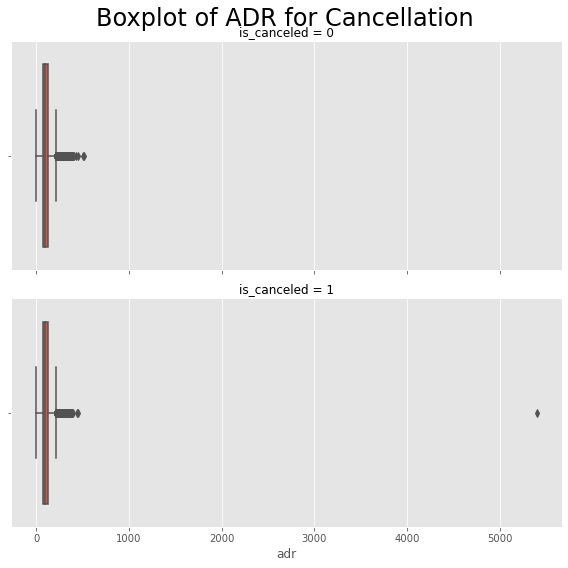

In [79]:
g = sns.FacetGrid(hotel_bookings, row="is_canceled", size=4, aspect=2)
g.map(sns.boxplot, "adr")
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Boxplot of ADR for Cancellation", fontsize=24)

Text(0.5, 1.0, 'Number of cancellation by prices of hotels')

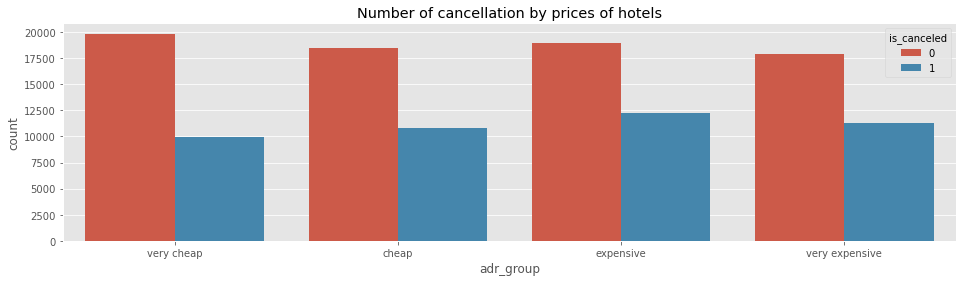

In [80]:
hotel_bookings['adr_group'] = pd.cut(hotel_bookings.adr,
                     bins=[-1, 69, 94, 126, 5400],
                     labels=["very cheap", "cheap", "expensive", "very expensive"])

plt.figure(figsize=(16,4))
sns.countplot(data=hotel_bookings, x="adr_group", hue="is_canceled")
plt.title("Number of cancellation by prices of hotels")

### Room Type Analysis

Text(0.5, 1.0, 'Average ADR by Assigned Room type')

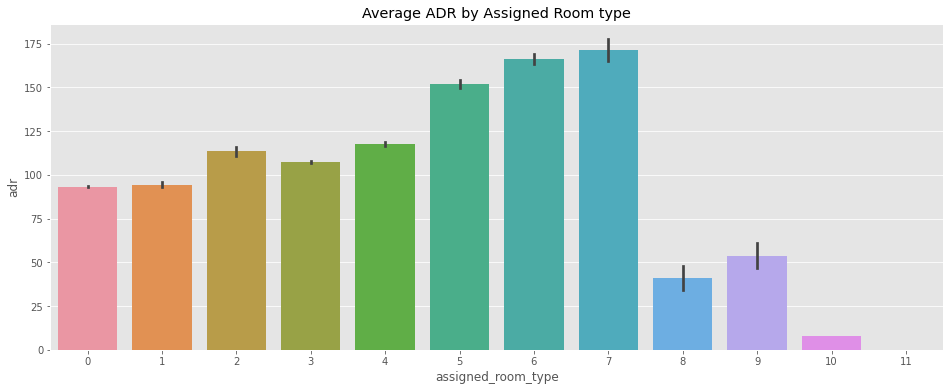

In [141]:
plt.figure(figsize=(16,6))
sns.barplot(data=hotel_bookings, x='assigned_room_type', y="adr", estimator=mean)
plt.title("Average ADR by Assigned Room type")

Text(0.5, 1.0, 'ADR group by Assigned Room type')

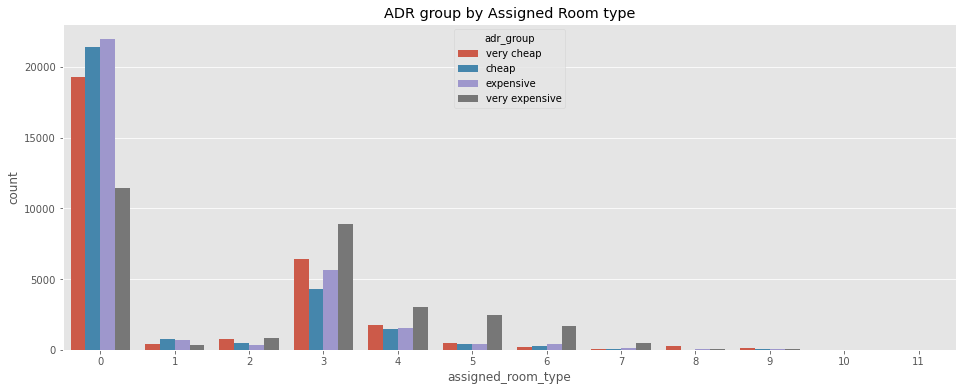

In [142]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings, x='assigned_room_type', hue="adr_group")
plt.title("ADR group by Assigned Room type")

<AxesSubplot:xlabel='reserved_room_type', ylabel='adr'>

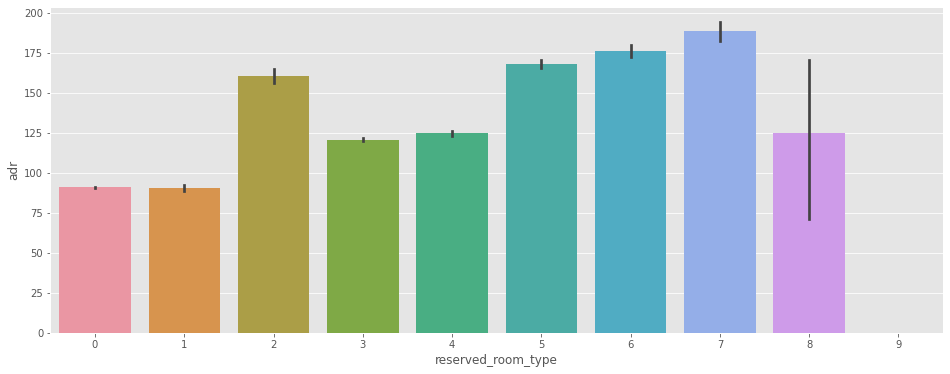

In [113]:
plt.figure(figsize=(16,6))
sns.barplot(data=hotel_bookings, x='reserved_room_type', y="adr", estimator=mean)
plt.title("Average ADR by Reserved Room type")

Text(0.5, 1.0, 'ADR group by Reserved Room type')

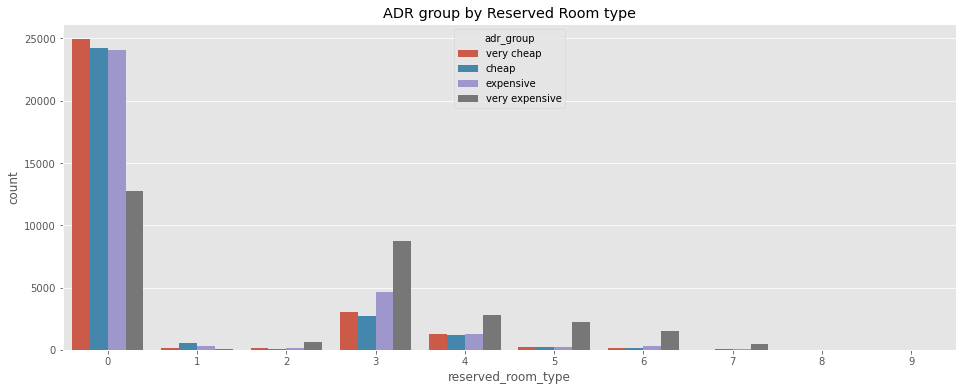

In [140]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings, x='reserved_room_type', hue="adr_group")
plt.title("ADR group by Reserved Room type")

### Adults/Children/Babies Analysis

<AxesSubplot:xlabel='adults', ylabel='count'>

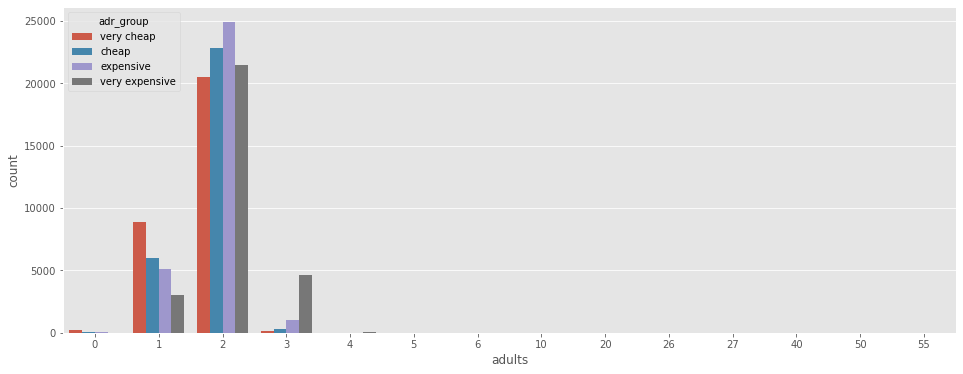

In [116]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings, x="adults", hue="adr_group")
plt.title("ADR group by number of adult guests")

Text(0.5, 1.0, 'Customer Types of adult guests')

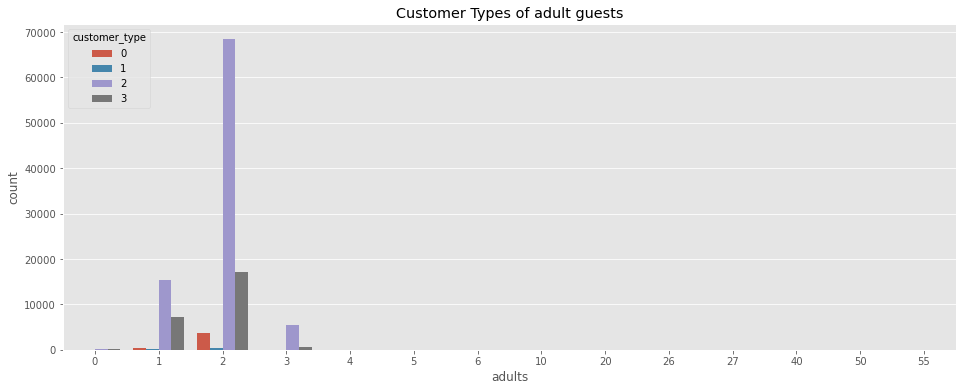

In [139]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings, x="adults", hue="customer_type")
plt.title("Customer Types of adult guests")

Text(0.5, 1.0, 'ADR group by number of child guests')

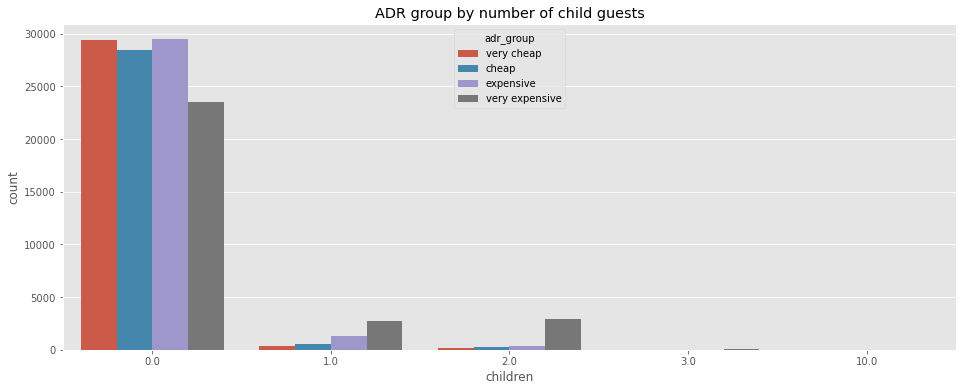

In [137]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings, x="children", hue="adr_group")
plt.title("ADR group by number of child guests")

Text(0.5, 1.0, 'ADR group by number of baby guests')

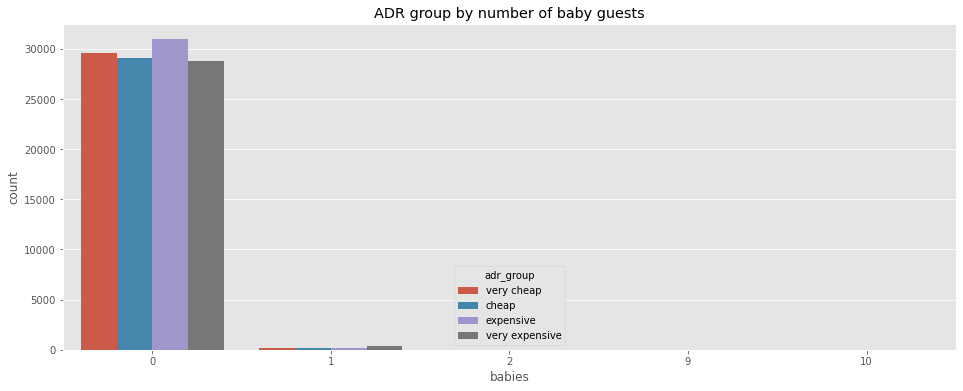

In [138]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings, x="babies", hue="adr_group")
plt.title("ADR group by number of baby guests")

Text(0.5, 1.0, 'ADR group by number of total guests')

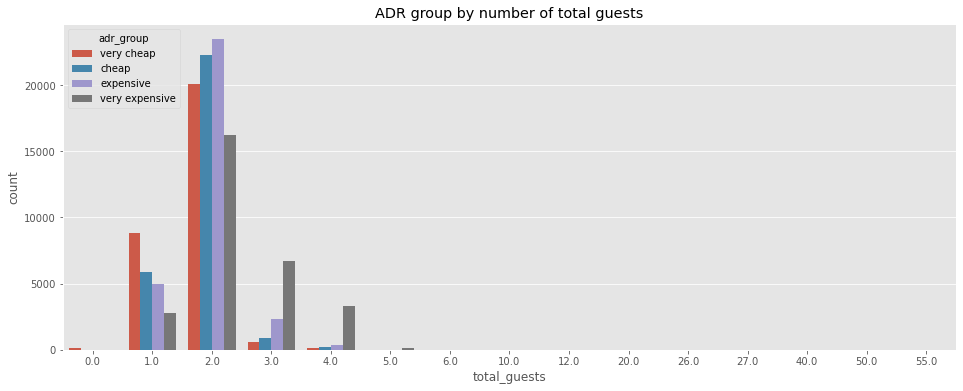

In [133]:
hotel_bookings["total_guests"] = hotel_bookings.adults + hotel_bookings.children + hotel_bookings.babies
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings, x="total_guests", hue="adr_group")
plt.title("ADR group by number of total guests")

### Booking Date Analysis

Text(0.5, 1.0, 'Average ADR over years')

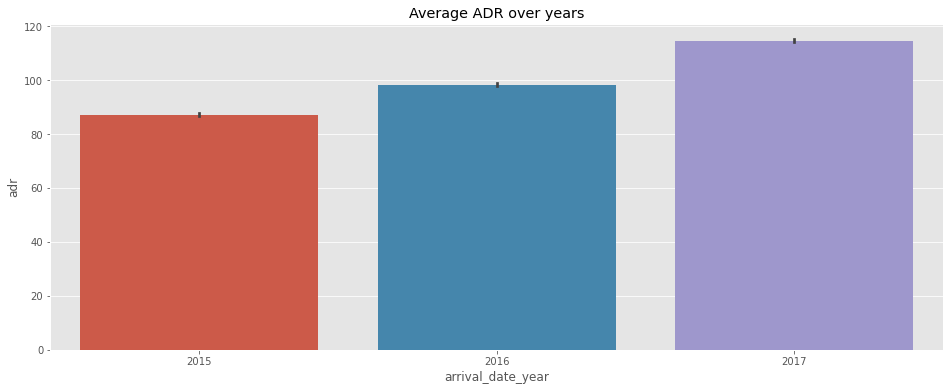

In [81]:
from numpy import mean
plt.figure(figsize=(16, 6))
sns.barplot(data=hotel_bookings, x='arrival_date_year', y="adr", estimator=mean)
plt.title("Average ADR over years")

Text(0.5, 1.0, 'Average ADR over years of Cancellation')

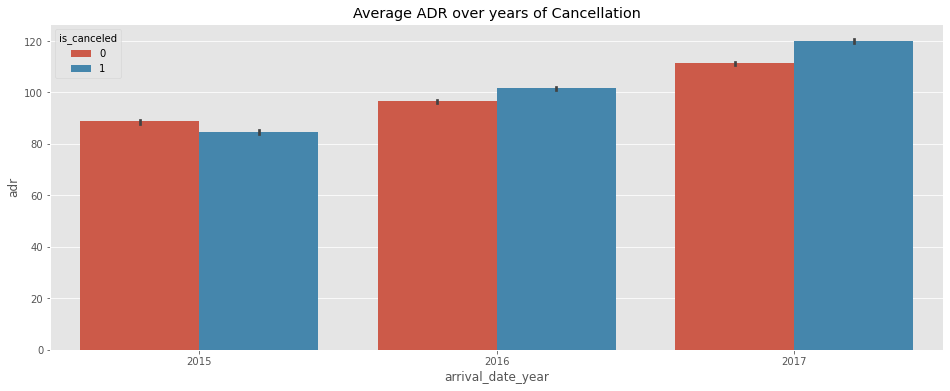

In [82]:
from numpy import mean
plt.figure(figsize=(16, 6))
sns.barplot(data=hotel_bookings, x='arrival_date_year', y="adr", estimator=mean, hue="is_canceled")
plt.title("Average ADR over years of Cancellation")

Text(0.5, 1.0, 'Average ADR for each Months')

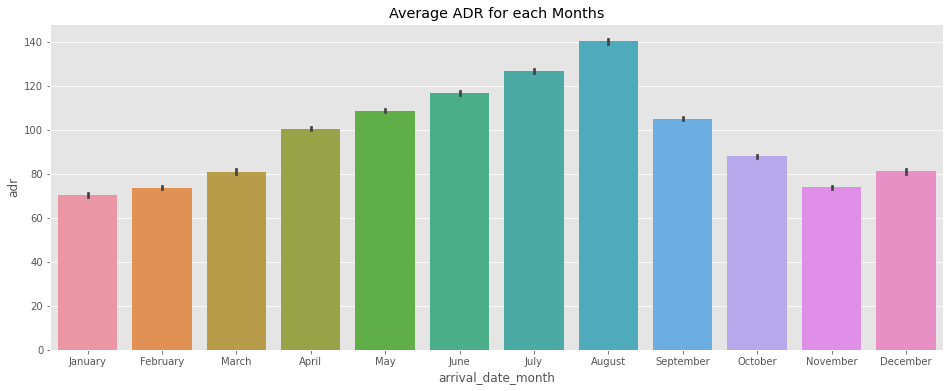

In [83]:
from numpy import mean
plt.figure(figsize=(16, 6))
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
hotel_bookings['arrival_date_month'] = pd.Categorical(hotel_bookings['arrival_date_month'], categories=months, ordered=True)
sns.barplot(data=hotel_bookings, x='arrival_date_month', y="adr", estimator=mean)
plt.title("Average ADR for each Months")

Text(0.5, 1.0, 'Counts of cancellation for each months')

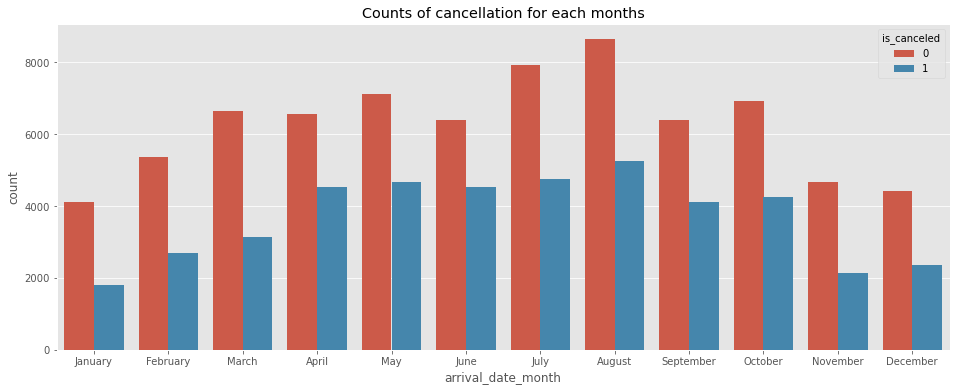

In [84]:
plt.figure(figsize=(16, 6))
sns.countplot(data=hotel_bookings, x="arrival_date_month", hue="is_canceled")
plt.title("Counts of cancellation for each months")

C:\Users\Chris\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Chris\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Average ADR of every months for each year')

<Figure size 1152x432 with 0 Axes>

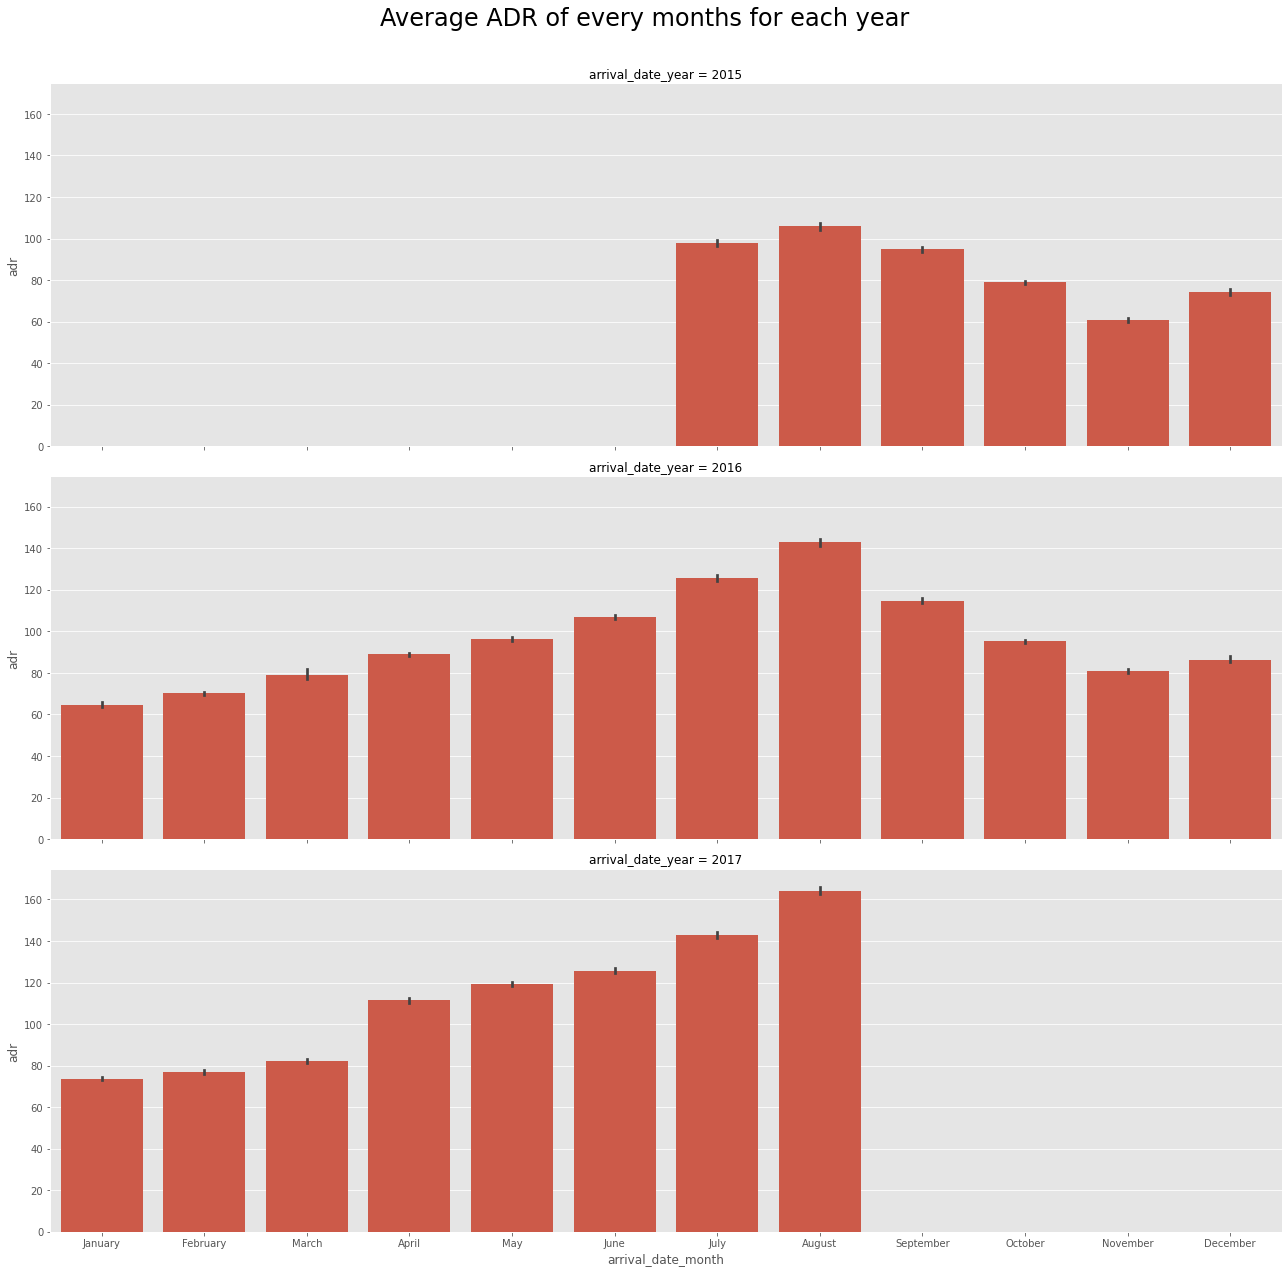

In [85]:
from numpy import mean
fig = plt.figure(figsize=(16, 6))
g = sns.FacetGrid(hotel_bookings, row="arrival_date_year", size=6, aspect=3)
g.map(sns.barplot, "arrival_date_month", "adr")
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Average ADR of every months for each year", fontsize=24)

C:\Users\Chris\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Chris\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Duration of Stays from 2015 to 2017')

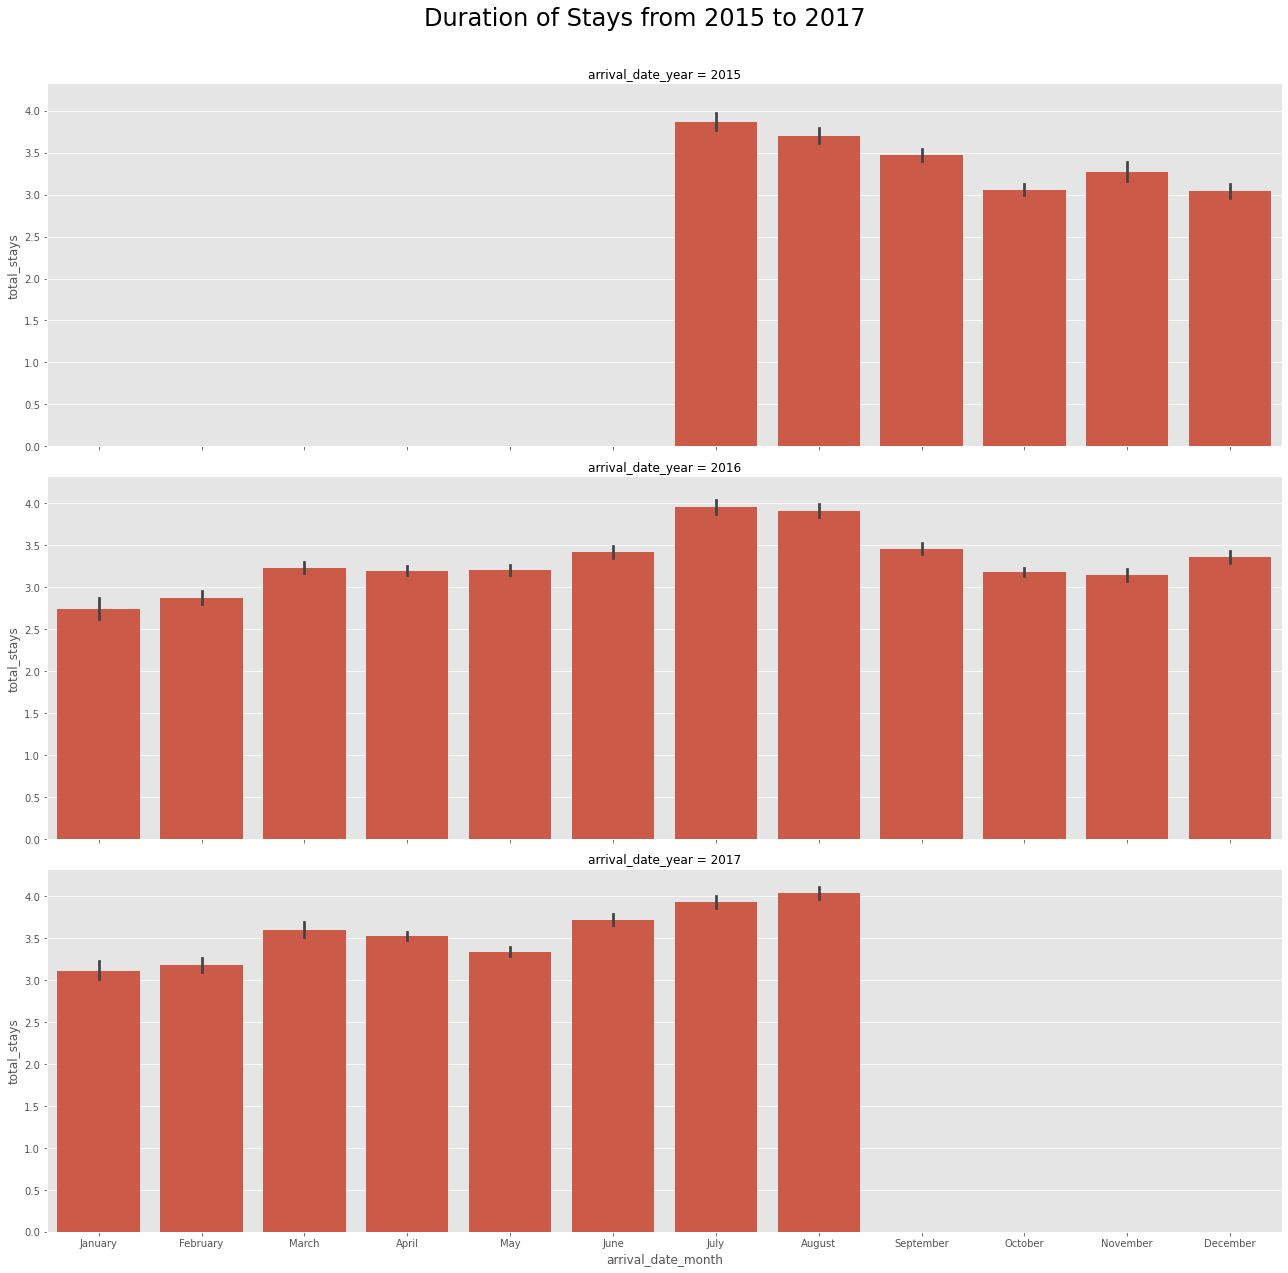

In [86]:
hotel_bookings["total_stays"] = hotel_bookings.stays_in_week_nights + hotel_bookings.stays_in_weekend_nights
g = sns.FacetGrid(hotel_bookings, row="arrival_date_year", size=6, aspect=3)
g.map(sns.barplot, "arrival_date_month", "total_stays")
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Duration of Stays from 2015 to 2017", fontsize=24)

Text(0.5, 1.0, 'Counts of cancellation for each months')

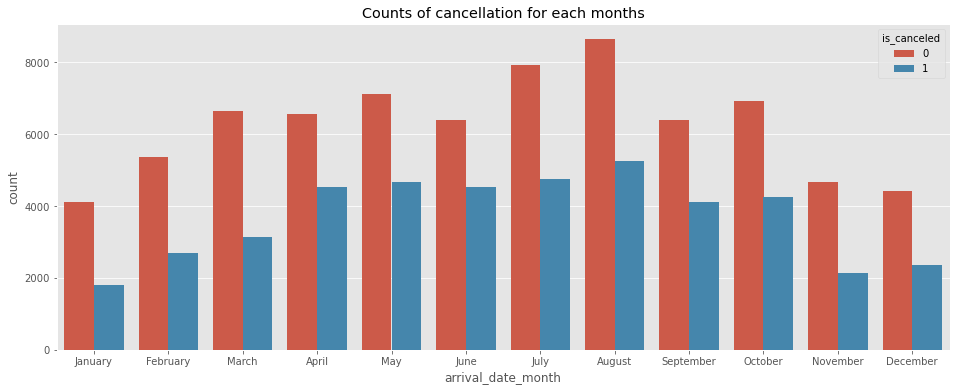

In [87]:
plt.figure(figsize=(16, 6))
sns.countplot(data=hotel_bookings, x="arrival_date_month", hue="is_canceled")
plt.title("Counts of cancellation for each months")

In [88]:
cleanup_arrival_date_month = {"arrival_date_month": {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12}}
hotel_bookings = hotel_bookings.replace(cleanup_arrival_date_month)
hotel_bookings.arrival_date_month.value_counts()

df2 = hotel_bookings[["arrival_date_year", "arrival_date_month"]].copy()
df2.columns = ["year", "month"]
df2
hotel_bookings['booking_date_noDate']=pd.to_datetime(df2['year'].astype(str)  + df2['month'].astype(str), format='%Y%m')

Text(0.5, 1.0, 'Timeseries of Average ADR')

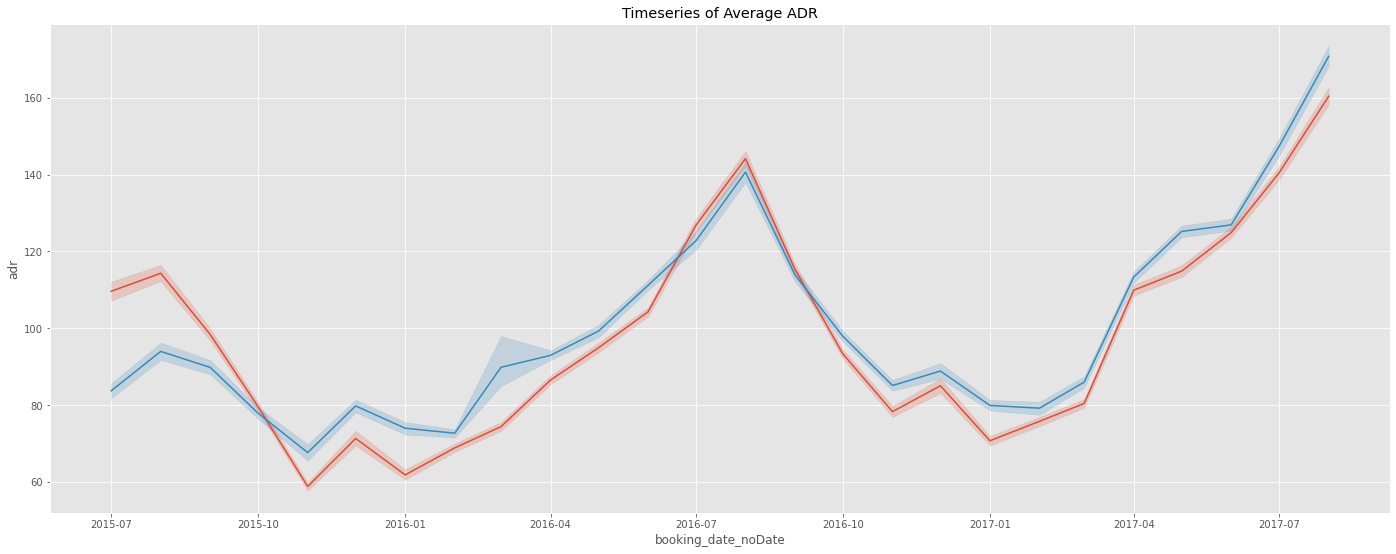

In [89]:
from numpy import mean
plt.figure(figsize=(24, 9))
sns.lineplot(data=hotel_bookings[hotel_bookings["is_canceled"] == 0], x="booking_date_noDate", y='adr', estimator=mean)
sns.lineplot(data=hotel_bookings[hotel_bookings["is_canceled"] == 1], x="booking_date_noDate", y='adr', estimator=mean)
plt.title("Timeseries of Average ADR")

C:\Users\Chris\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Average ADR from 2015 to 2017')

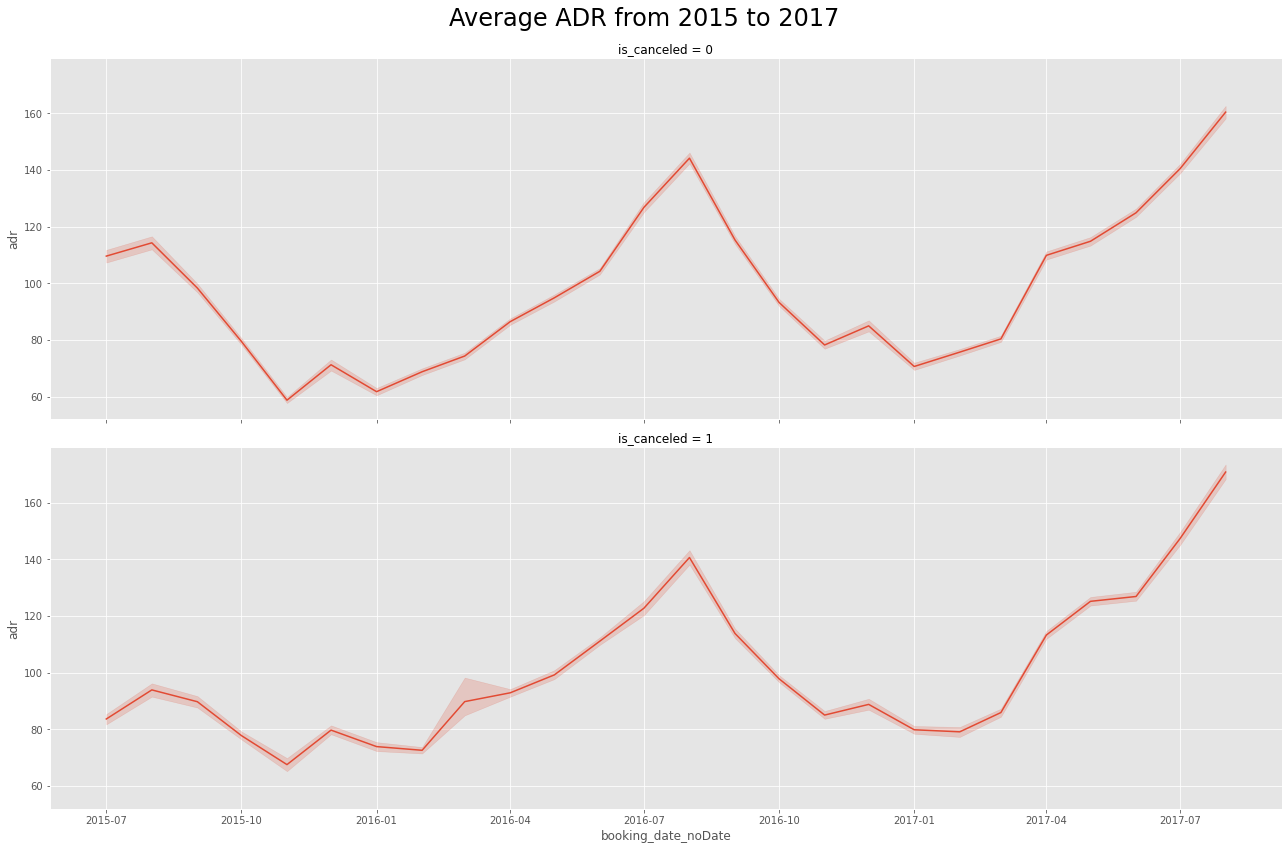

In [90]:
g = sns.FacetGrid(hotel_bookings, row="is_canceled", size=6, aspect=3)
g.map(sns.lineplot, "booking_date_noDate", "adr")
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Average ADR from 2015 to 2017", fontsize=24)

Text(0.5, 1.0, 'Number of cancellation over time from 2015 to 2017')

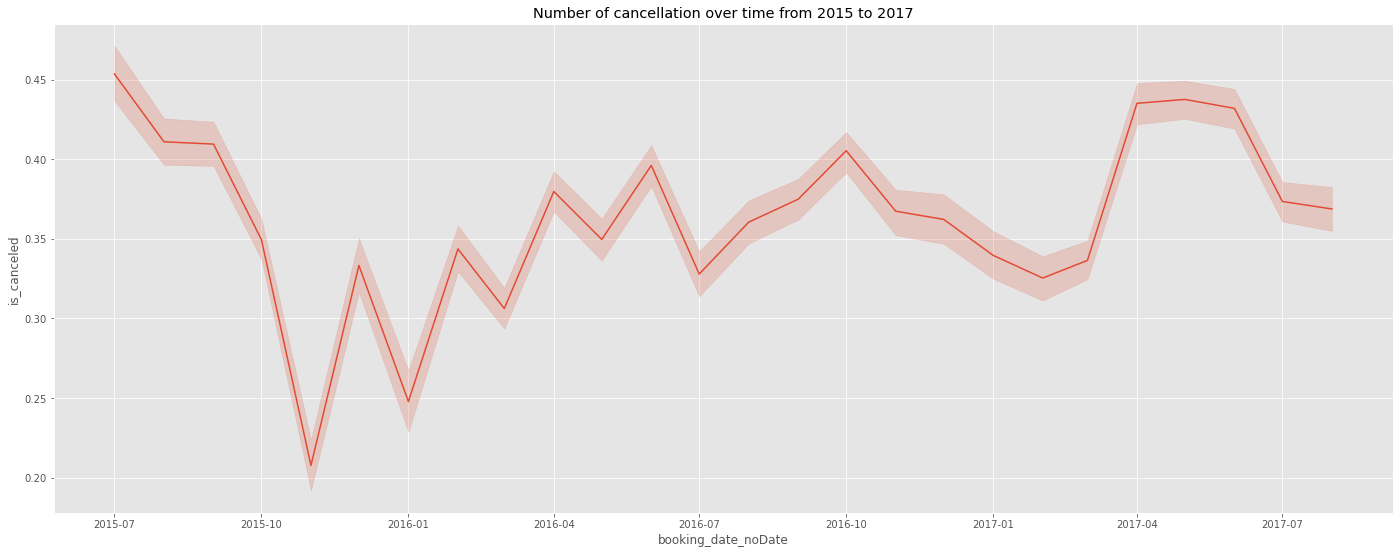

In [115]:
plt.figure(figsize=(24, 9))
sns.lineplot(data=hotel_bookings, x="booking_date_noDate", y="is_canceled", estimator=mean)
plt.title("Number of cancellation over time from 2015 to 2017")

Text(0.5, 1.0, 'Number of guests over time from 2015 to 2017')

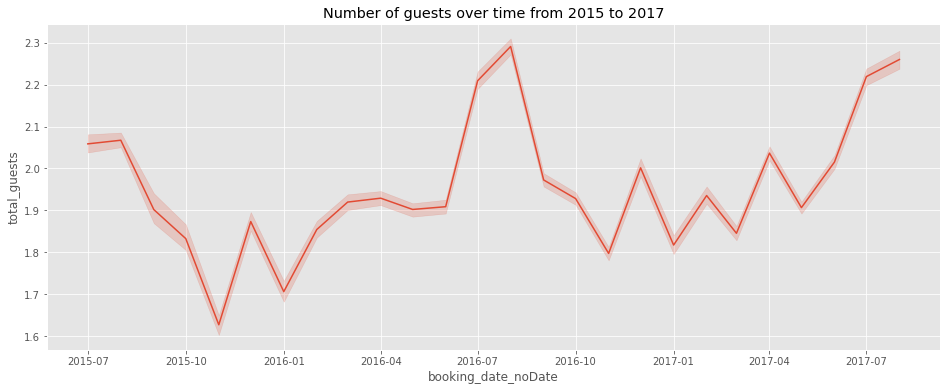

In [129]:
plt.figure(figsize=(16,6))
sns.lineplot(data=hotel_bookings, x="booking_date_noDate", y='total_guests', estimator=mean)
plt.title("Number of guests over time from 2015 to 2017")

Text(0.5, 1.0, 'Average Duration of Stays over year from 2015 to 2017')

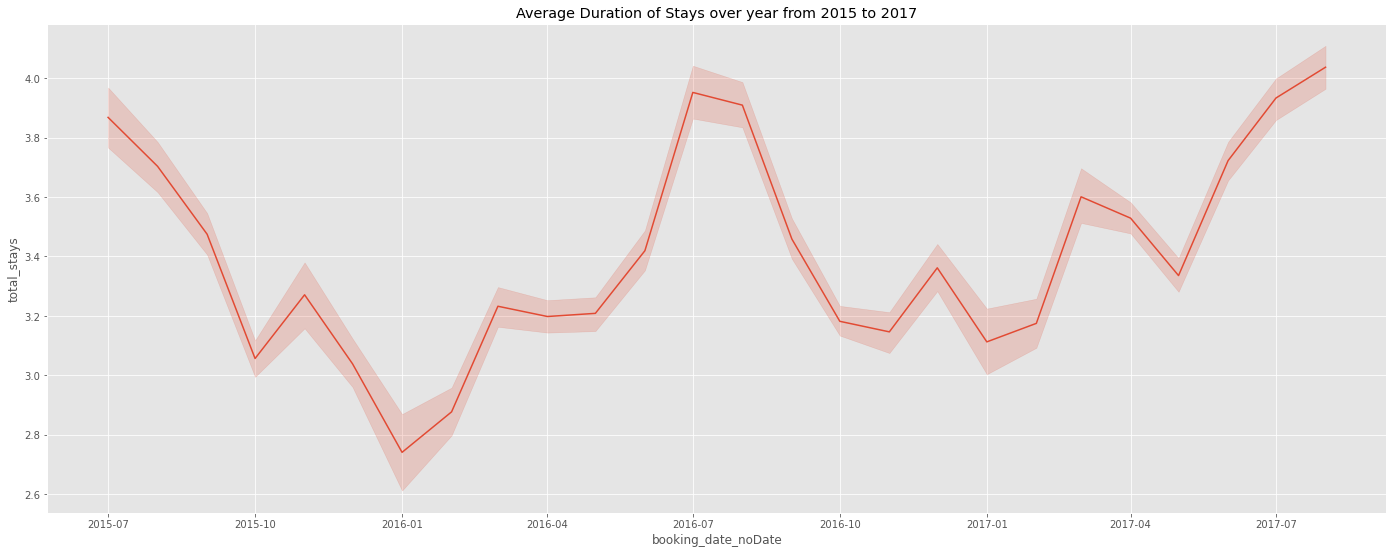

In [130]:
from numpy import mean
plt.figure(figsize=(24, 9))
sns.lineplot(data=hotel_bookings, x="booking_date_noDate", y='total_stays', estimator=mean)
plt.title("Average Duration of Stays over year from 2015 to 2017")

Text(0.5, 1.0, 'Average ADR of week stays')

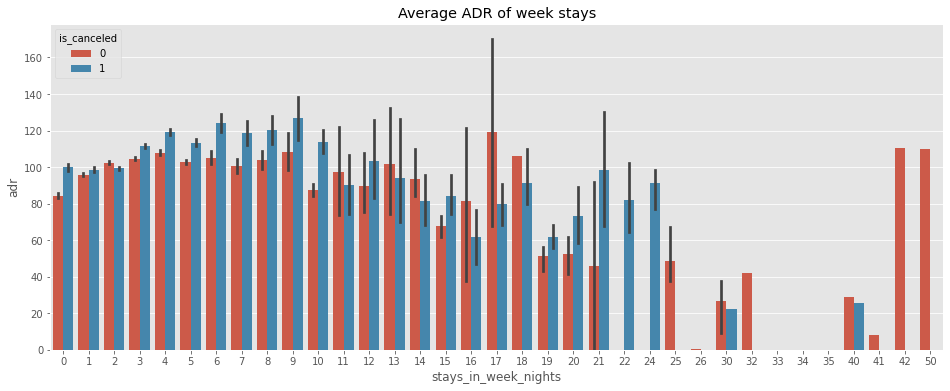

In [131]:
from numpy import mean
plt.figure(figsize=(16, 6))
sns.barplot(data=hotel_bookings, x='stays_in_week_nights', y="adr", estimator=mean, hue="is_canceled")
plt.title("Average ADR of week stays")

Text(0.5, 1.0, 'Average ADR of weekend stays')

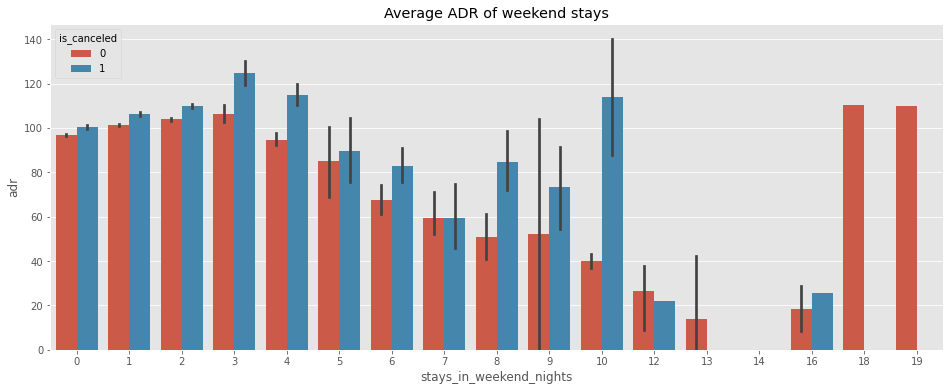

In [132]:
from numpy import mean
plt.figure(figsize=(16, 6))
sns.barplot(data=hotel_bookings, x='stays_in_weekend_nights', y="adr", estimator=mean, hue="is_canceled")
plt.title("Average ADR of weekend stays")

### Deposit Type Analysis

Text(0.5, 1.0, 'Number of cancellation by deposit type')

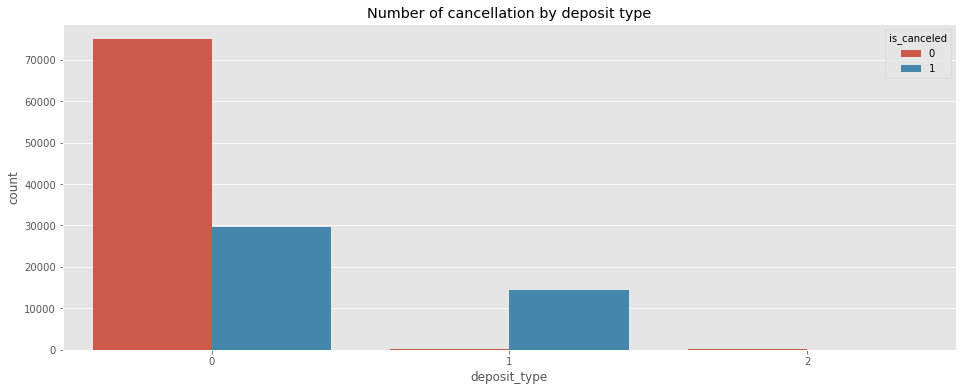

In [94]:
plt.figure(figsize=(16, 6))
sns.countplot(data=hotel_bookings, x='deposit_type', hue="is_canceled")
plt.title("Number of cancellation by deposit type")

Text(0.5, 1.0, 'ADR groups by deposit type')

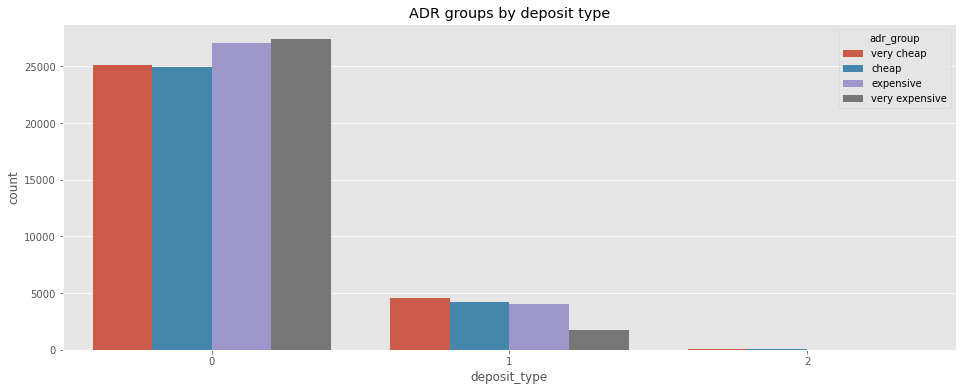

In [128]:
plt.figure(figsize=(16,6))
sns.countplot(data=hotel_bookings, x="deposit_type", hue="adr_group")
plt.title("ADR groups by deposit type")